### Packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

### Dataset

In [7]:
np.random.seed(42)

# Number of sample wallets
n = 200

# Generating synthetic dataset with imbalance (80% Low Risk, 20% High Risk)
data = {
    "Wallet_ID": [f"WALLET_{i+1}" for i in range(n)],
    "Total_Transactions": np.random.randint(10, 1000, n),
    "Avg_Tx_Value": np.round(np.random.uniform(20, 10000, n), 2),
    "Incoming_Tx": np.random.randint(5, 800, n),
    "Outgoing_Tx": np.random.randint(5, 800, n),
    "Exchange_Interaction": np.round(np.random.uniform(0, 100, n), 2),
    "Defi_Interaction": np.round(np.random.uniform(0, 100, n), 2),
    "Suspicious_Flags": np.random.randint(0, 15, n),
    "Wallet_Age": np.random.randint(30, 3000, n),
    "High_Risk_Label": np.random.choice(["Yes", "No"], n, p=[0.2, 0.8])  # 20% Yes, 80% No
}

# Convert to DataFrame
imbalanced_df = pd.DataFrame(data)

# Quick check of class distribution
print(imbalanced_df["High_Risk_Label"].value_counts())

# Save if needed
imbalanced_df.to_csv("synthetic_crypto_wallet_dataset.csv", index=False)

High_Risk_Label
No     157
Yes     43
Name: count, dtype: int64


In [9]:
# Use a single consistent DataFrame name
df = imbalanced_df.copy()

### Basic info

In [13]:
df = imbalanced_df

print(df.info())
# Missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wallet_ID             200 non-null    object 
 1   Total_Transactions    200 non-null    int32  
 2   Avg_Tx_Value          200 non-null    float64
 3   Incoming_Tx           200 non-null    int32  
 4   Outgoing_Tx           200 non-null    int32  
 5   Exchange_Interaction  200 non-null    float64
 6   Defi_Interaction      200 non-null    float64
 7   Suspicious_Flags      200 non-null    int32  
 8   Wallet_Age            200 non-null    int32  
 9   High_Risk_Label       200 non-null    object 
dtypes: float64(3), int32(5), object(2)
memory usage: 11.8+ KB
None
Wallet_ID               0
Total_Transactions      0
Avg_Tx_Value            0
Incoming_Tx             0
Outgoing_Tx             0
Exchange_Interaction    0
Defi_Interaction        0
Suspicious_Flags        0
Wallet_

### Dataframe

In [41]:
df = pd.read_csv("synthetic_crypto_wallet_dataset.csv")
df

,Wallet_ID,Total_Transactions,Avg_Tx_Value,Incoming_Tx,Outgoing_Tx,Exchange_Interaction,Defi_Interaction,Suspicious_Flags,Wallet_Age,High_Risk_Label
0,WALLET_1,112,9077.51,660,523,90.32,70.70,2,2080,Yes
1,WALLET_2,445,2507.94,273,178,61.73,77.86,9,1195,Yes
2,WALLET_3,870,4115.62,374,657,98.05,14.31,12,405,No
3,WALLET_4,280,7560.40,640,172,60.81,20.45,4,2063,No
4,WALLET_5,116,2303.41,110,174,63.66,71.41,10,2401,No
...,...,...,...,...,...,...,...,...,...,...
195,WALLET_196,752,871.77,13,211,49.54,42.20,6,792,No
196,WALLET_197,250,535.78,78,233,74.15,35.39,3,1280,No
197,WALLET_198,573,5322.92,496,582,57.32,95.86,4,977,No
198,WALLET_199,105,5415.54,257,79,99.77,18.44,0,2458,No


In [43]:
df.head()

,Wallet_ID,Total_Transactions,Avg_Tx_Value,Incoming_Tx,Outgoing_Tx,Exchange_Interaction,Defi_Interaction,Suspicious_Flags,Wallet_Age,High_Risk_Label
0,WALLET_1,112,9077.51,660,523,90.32,70.70,2,2080,Yes
1,WALLET_2,445,2507.94,273,178,61.73,77.86,9,1195,Yes
2,WALLET_3,870,4115.62,374,657,98.05,14.31,12,405,No
3,WALLET_4,280,7560.40,640,172,60.81,20.45,4,2063,No
4,WALLET_5,116,2303.41,110,174,63.66,71.41,10,2401,No


In [45]:
df.tail()

,Wallet_ID,Total_Transactions,Avg_Tx_Value,Incoming_Tx,Outgoing_Tx,Exchange_Interaction,Defi_Interaction,Suspicious_Flags,Wallet_Age,High_Risk_Label
195,WALLET_196,752,871.77,13,211,49.54,42.20,6,792,No
196,WALLET_197,250,535.78,78,233,74.15,35.39,3,1280,No
197,WALLET_198,573,5322.92,496,582,57.32,95.86,4,977,No
198,WALLET_199,105,5415.54,257,79,99.77,18.44,0,2458,No
199,WALLET_200,909,6381.55,234,439,75.24,9.03,13,2537,Yes


### Descriptive statistics

In [47]:
numerical = ["Total_Transactions","Avg_Tx_Value","Incoming_Tx","Outgoing_Tx","Exchange_Interaction","Defi_Interaction","Wallet_Age"]
categorical = ["High_Risk_Label"]

print("\nCategorical Variables:", categorical)
print("Numerical Variables:", numerical)


Categorical Variables: ['High_Risk_Label']
Numerical Variables: ['Total_Transactions', 'Avg_Tx_Value', 'Incoming_Tx', 'Outgoing_Tx', 'Exchange_Interaction', 'Defi_Interaction', 'Wallet_Age']


In [49]:
print("\nMean:\n", df[numerical].mean())
print("\nMedian:\n",df[numerical].median())
print("\nVariance:\n", df[numerical].var())
print("\nStandard Deviation:\n", df[numerical].std())


Mean:
 Total_Transactions       500.22000
Avg_Tx_Value            5100.50085
Incoming_Tx              415.59500
Outgoing_Tx              389.66500
Exchange_Interaction      51.94075
Defi_Interaction          51.19025
Wallet_Age              1488.52000
dtype: float64

Median:
 Total_Transactions       496.500
Avg_Tx_Value            5314.415
Incoming_Tx              423.000
Outgoing_Tx              392.000
Exchange_Interaction      53.855
Defi_Interaction          51.385
Wallet_Age              1382.000
dtype: float64

Variance:
 Total_Transactions      8.409009e+04
Avg_Tx_Value            8.505630e+06
Incoming_Tx             5.754715e+04
Outgoing_Tx             5.509938e+04
Exchange_Interaction    7.661060e+02
Defi_Interaction        7.384308e+02
Wallet_Age              6.624919e+05
dtype: float64

Standard Deviation:
 Total_Transactions       289.982917
Avg_Tx_Value            2916.441384
Incoming_Tx              239.889864
Outgoing_Tx              234.732571
Exchange_Interaction    

In [51]:
df.describe()

,Total_Transactions,Avg_Tx_Value,Incoming_Tx,Outgoing_Tx,Exchange_Interaction,Defi_Interaction,Suspicious_Flags,Wallet_Age
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000
mean,500.220000,5100.500850,415.595000,389.665000,51.94075,51.190250,7.010000,1488.520000
std,289.982917,2916.441384,239.889864,234.732571,27.67862,27.174083,4.316603,813.936072
min,11.000000,70.510000,13.000000,5.000000,0.26000,1.220000,0.000000,32.000000
25%,250.750000,2494.710000,199.000000,180.250000,33.02500,28.532500,3.000000,833.250000
50%,496.500000,5314.415000,423.000000,392.000000,53.85500,51.385000,7.000000,1382.000000
75%,761.750000,7641.855000,638.000000,573.000000,73.69500,75.355000,11.000000,2174.750000
max,996.000000,9900.740000,796.000000,799.000000,99.77000,98.870000,14.000000,2993.000000


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Train distribution:\n", y_train.value_counts())
print("\nTest distribution:\n", y_test.value_counts())

Train distribution:
 High_Risk_Label
0    110
1     30
Name: count, dtype: int64

Test distribution:
 High_Risk_Label
0    47
1    13
Name: count, dtype: int64


In [55]:
# Features + Target
X = df.drop(columns=["Wallet_ID", "High_Risk_Label"])
y = df["High_Risk_Label"].map({"Yes": 1, "No": 0})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Scale features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg = LogisticRegression(class_weight="balanced", random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:,1]



# Random Forest
rf = RandomForestClassifier(class_weight="balanced", random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]



# Evaluation
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print("\nRandom Forest:\n", classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))

Logistic Regression:
               precision    recall  f1-score   support

           0       0.73      0.51      0.60        47
           1       0.15      0.31      0.20        13

    accuracy                           0.47        60
   macro avg       0.44      0.41      0.40        60
weighted avg       0.60      0.47      0.51        60

ROC-AUC: 0.4304418985270049

Random Forest:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88        47
           1       0.00      0.00      0.00        13

    accuracy                           0.78        60
   macro avg       0.39      0.50      0.44        60
weighted avg       0.61      0.78      0.69        60

ROC-AUC: 0.6014729950900164


E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### PLOTS

### Histogram

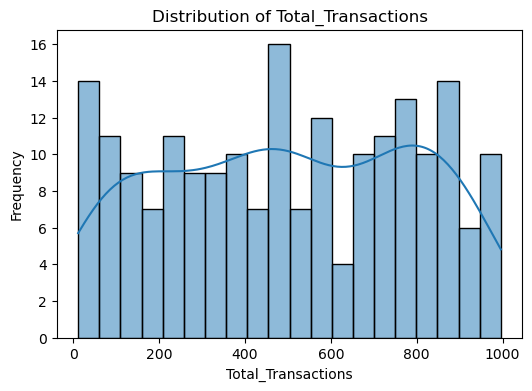

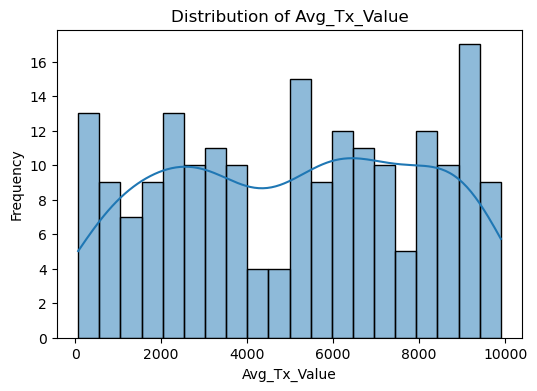

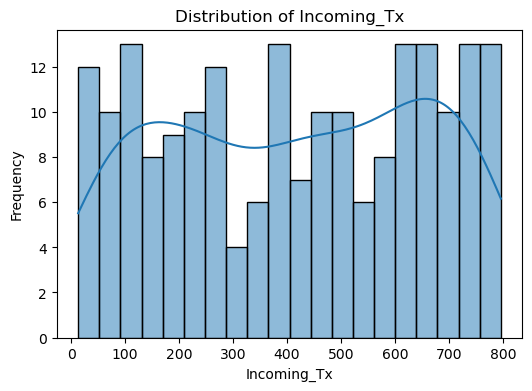

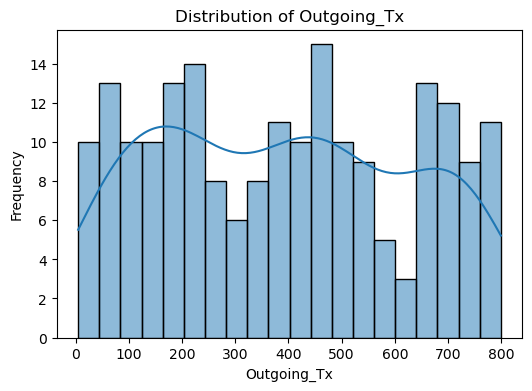

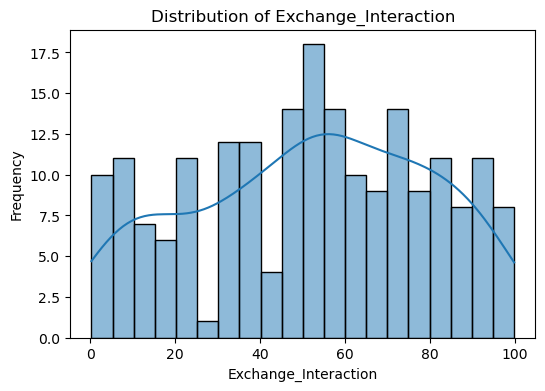

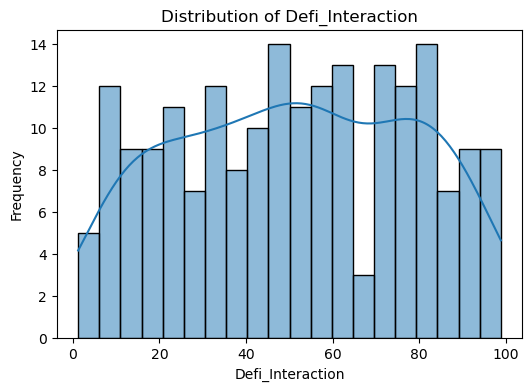

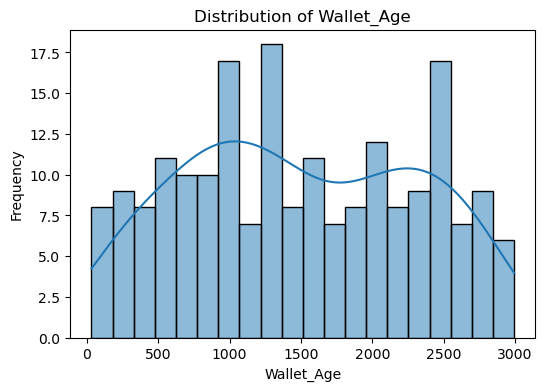

In [59]:
for col in numerical:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

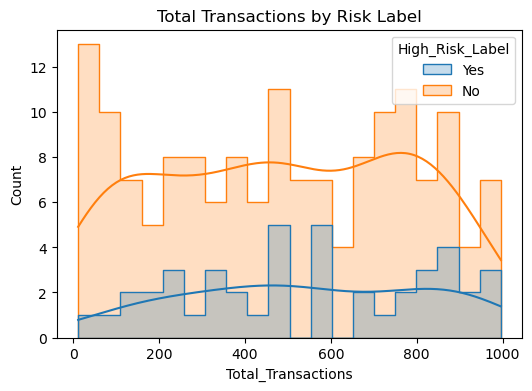

In [61]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Total_Transactions", hue="High_Risk_Label", bins=20, kde=True, element="step")
plt.title("Total Transactions by Risk Label")
plt.show()

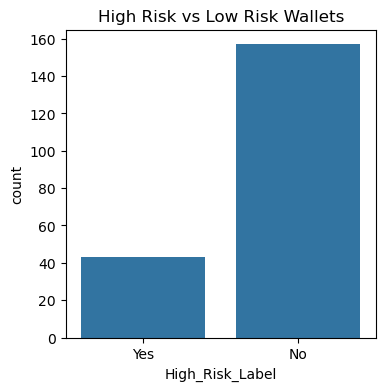

In [63]:
plt.figure(figsize=(4,4))
sns.countplot(x="High_Risk_Label", data=df)
plt.title("High Risk vs Low Risk Wallets")
plt.show()

### Scatter plot

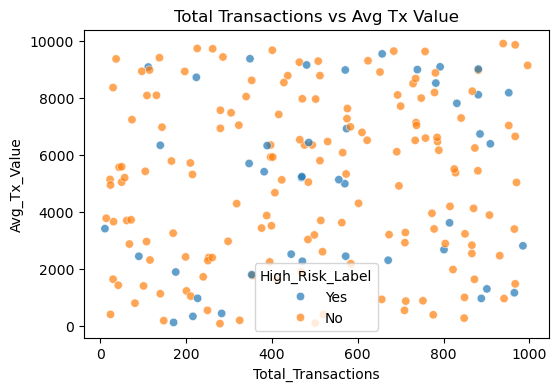

In [65]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Total_Transactions", y="Avg_Tx_Value", data=df, hue="High_Risk_Label", alpha=0.7)
plt.title("Total Transactions vs Avg Tx Value")
plt.show()

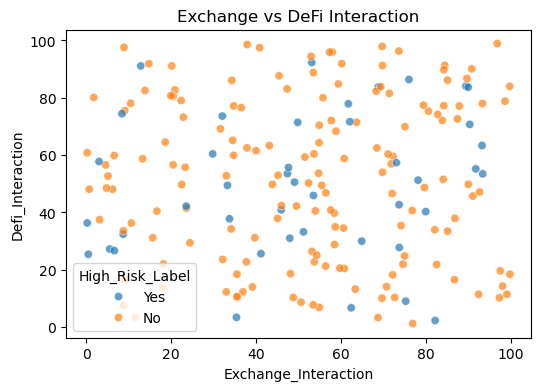

In [67]:
# Scatter: Exchange vs DeFi Interaction
plt.figure(figsize=(6,4))
sns.scatterplot(x="Exchange_Interaction", y="Defi_Interaction", data=df, hue="High_Risk_Label", alpha=0.7)
plt.title("Exchange vs DeFi Interaction")
plt.show()

### Boxplot

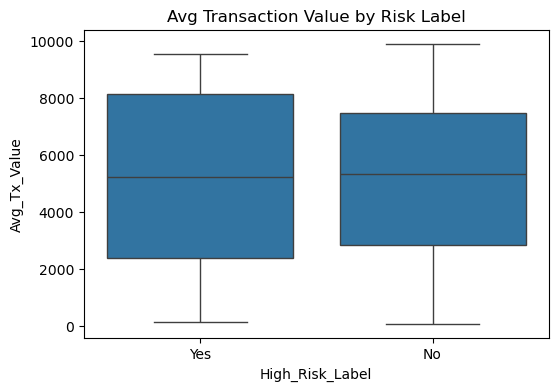

In [69]:
# 3. Risk Patterns (by Category)
# -----------------------------
# Boxplot of Avg_Tx_Value grouped by High_Risk_Label
plt.figure(figsize=(6,4))
sns.boxplot(x="High_Risk_Label", y="Avg_Tx_Value", data=df)
plt.title("Avg Transaction Value by Risk Label")
plt.show()

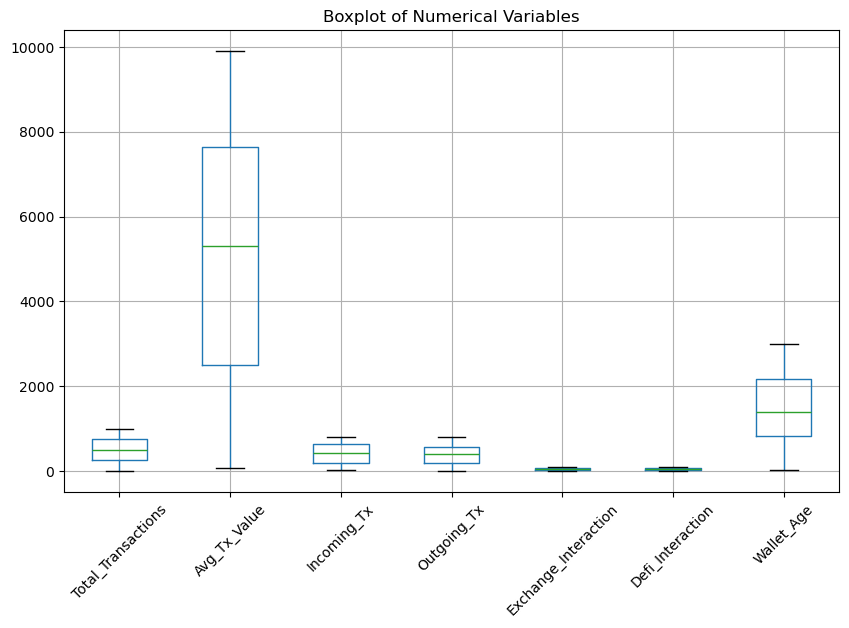

In [71]:
# Boxplots for detecting outliers
plt.figure(figsize=(10,6))
df[numerical].boxplot()
plt.title("Boxplot of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

### Heatmap

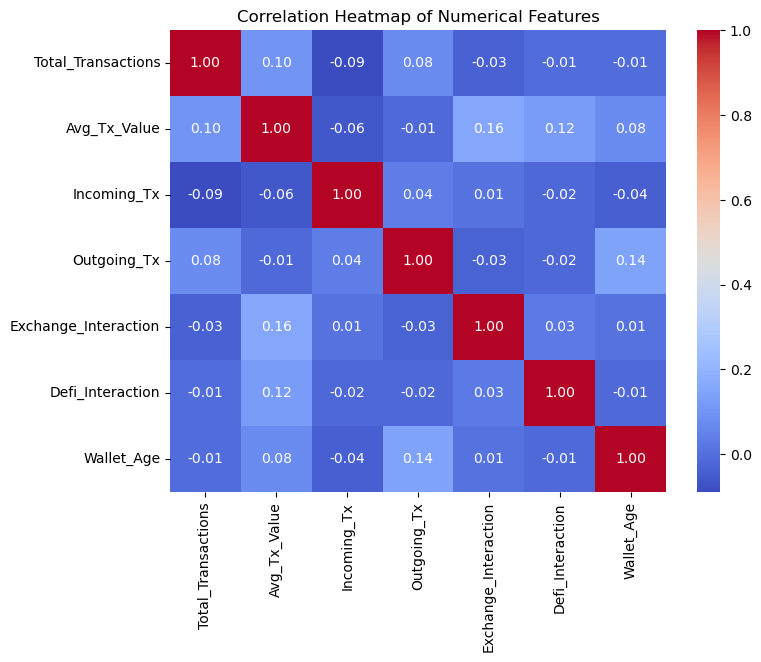

In [73]:
plt.figure(figsize=(8,6))
corr = df[numerical].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<Axes: xlabel='High_Risk_Label', ylabel='count'>

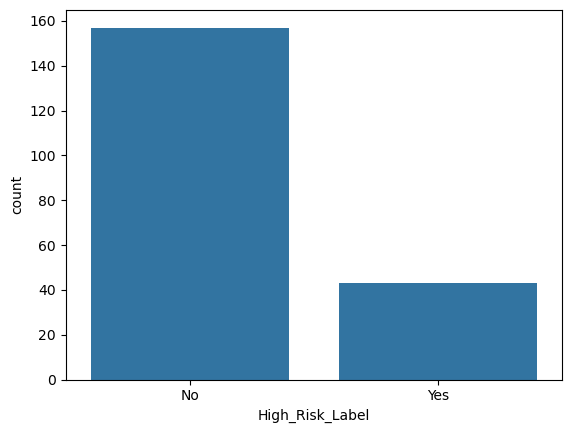

In [83]:
sns.countplot(
    x="High_Risk_Label",
    data=df,
    order=["No", "Yes"]
)


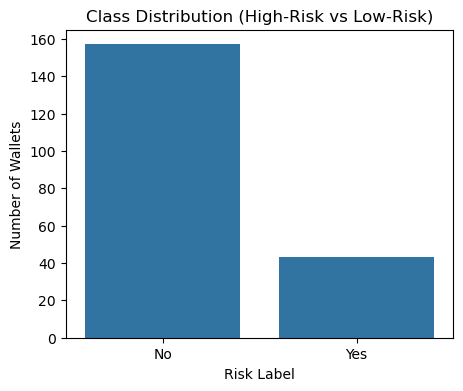

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Safety reset
plt.close("all")

# Create figure explicitly
fig, ax = plt.subplots(figsize=(5, 4))

sns.countplot(
    x="High_Risk_Label",
    data=df,
    order=["No", "Yes"],
    ax=ax
)

ax.set_title("Class Distribution (High-Risk vs Low-Risk)")
ax.set_xlabel("Risk Label")
ax.set_ylabel("Number of Wallets")

# Save THIS figure explicitly
fig.savefig("class_imbalance.png", dpi=150, bbox_inches="tight")

plt.show()
plt.close(fig)

<Figure size 640x480 with 0 Axes>